# Assignment - 4

### Customer Segmentation Analysis

### Problem Statement
### You own the mall and want to understand the customers who can quickly converge [Target Customers] so that the insight can be given to the marketing team and plan the strategy accordingly

### 1. Dataset Downloaded:

### 2. Load the dataset into the tool.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3. Perform Below Visualizations.

#### i) Univariate Analysis

##### Histogram

<AxesSubplot:xlabel='Age', ylabel='Count'>

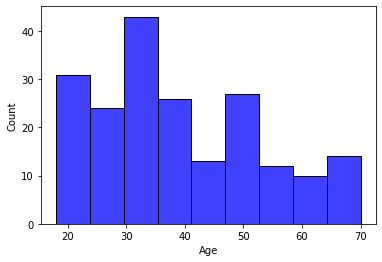

In [3]:
sns.histplot(df["Age"], color='blue')

##### Countplot

<AxesSubplot:xlabel='Gender', ylabel='count'>

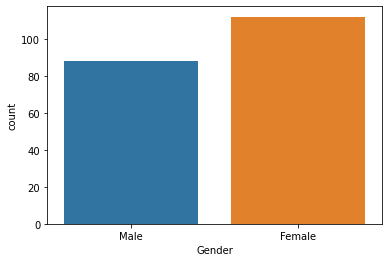

In [4]:
sns.countplot(x=df['Gender']) 

##### Box Plot

<AxesSubplot:xlabel='Annual Income (k$)'>

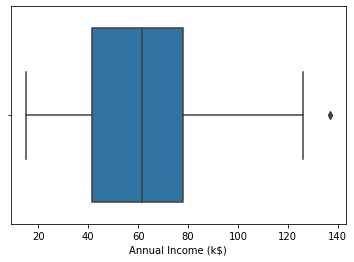

In [5]:
sns.boxplot(x=df["Annual Income (k$)"]) 

#### ii)Bi - Variate Analysis

##### LinearPlot

C:\Users\Anju Priya V\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Gender'>

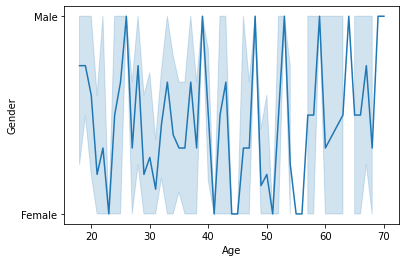

In [6]:
sns.lineplot(df["Age"],df["Gender"])

##### Scatter Plot

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

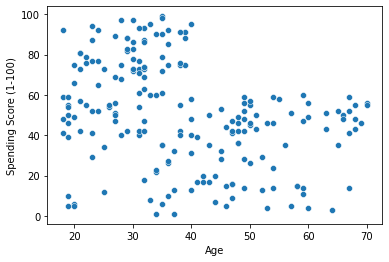

In [7]:
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'])

##### Pointplot

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

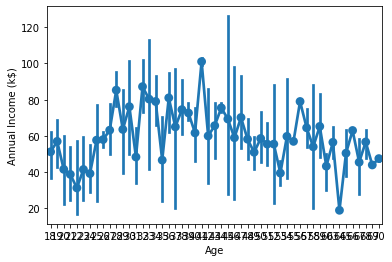

In [8]:
sns.pointplot(x='Age',y='Annual Income (k$)',data=df)

##### iii) Multi-Variate Analysis

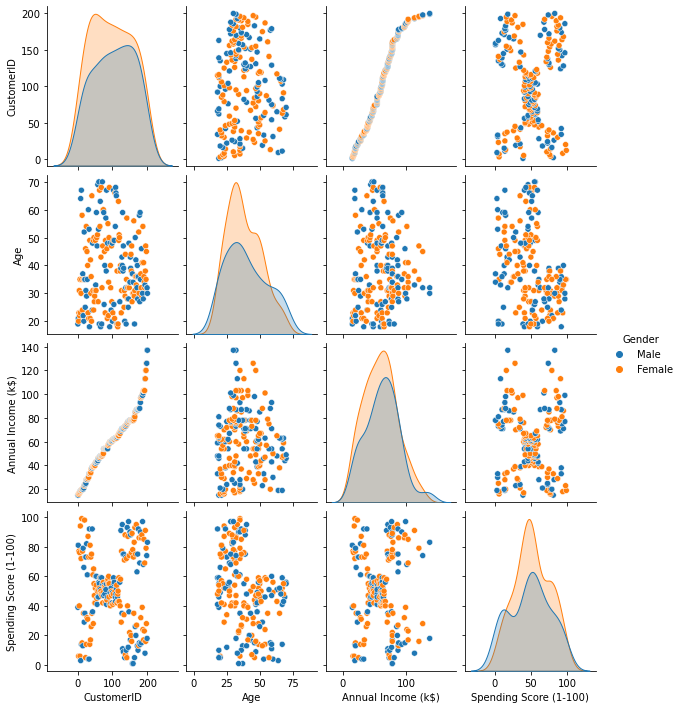

In [9]:
sns.pairplot(
    data=df, 
    aspect=.85,
    hue='Gender');

### 4. Perform descriptive statistics on the dataset.

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.shape

(200, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.mean()

C:\Users\Anju Priya V\AppData\Local\Temp/ipykernel_28376/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [14]:
df.median()

C:\Users\Anju Priya V\AppData\Local\Temp/ipykernel_28376/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [15]:
df.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


### 5. Check for Missing values and deal with them.

In [16]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 6. Find the outliers and replace them outliers

C:\Users\Anju Priya V\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

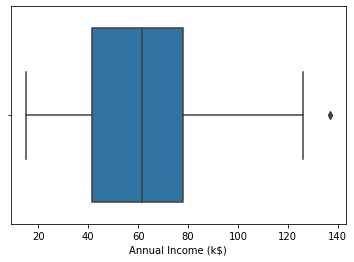

In [17]:
sns.boxplot(df['Annual Income (k$)'],data=df)

In [18]:
df['Annual Income (k$)'].skew()

0.3218425498619055

In [20]:
quartile1=df['Annual Income (k$)'].quantile(0.25)
quartile2=df['Annual Income (k$)'].quantile(0.75)
Interquartile_range=quartile2-quartile1
whisker_width = 1.5
lower_whisker = quartile1 -(whisker_width*Interquartile_range)
upper_whisker = quartile2 + (whisker_width*Interquartile_range)
df['Annual Income (k$)']=np.where((df['Annual Income (k$)'])>upper_whisker,upper_whisker,np.where(df['Annual Income (k$)']<lower_whisker,lower_whisker,df['Annual Income (k$)']))

C:\Users\Anju Priya V\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

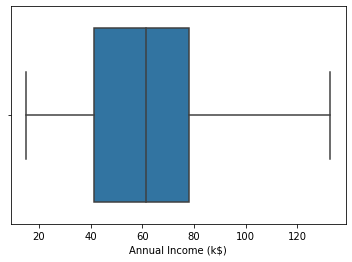

In [21]:
sns.boxplot(df['Annual Income (k$)'],data=df)

### 7. Check for Categorical columns and perform encoding.

In [22]:
numericValue = df[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']]
categoricalValue = df[['Gender']]


In [23]:
numericValue.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,2,21,15.0,81
2,3,20,16.0,6
3,4,23,16.0,77
4,5,31,17.0,40


In [24]:
categoricalValue.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [25]:
from sklearn.preprocessing import OneHotEncoder

Gender_encoder = OneHotEncoder()
Gender_reshaped = np.array(categoricalValue['Gender']).reshape(-1, 1)
Gender_values = Gender_encoder.fit_transform(Gender_reshaped)

print(categoricalValue['Gender'][:5])
print(Gender_values.toarray()[:5])
print(Gender_encoder.inverse_transform(Gender_values)[:5])

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[['Male']
 ['Male']
 ['Female']
 ['Female']
 ['Female']]


### 8. Scaling the data

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']]

scaledX = scale.fit_transform(X)

In [27]:
scaledX

array([[-1.7234121 , -1.42456879, -1.74542941, -0.43480148],
       [-1.70609137, -1.28103541, -1.74542941,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70708307, -1.71591298],
       [-1.67144992, -1.13750203, -1.70708307,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66873673, -0.39597992],
       [-1.63680847, -1.20926872, -1.66873673,  1.00159627],
       [-1.61948775, -0.27630176, -1.6303904 , -1.71591298],
       [-1.60216702, -1.13750203, -1.6303904 ,  1.70038436],
       [-1.5848463 ,  1.80493225, -1.59204406, -1.83237767],
       [-1.56752558, -0.6351352 , -1.59204406,  0.84631002],
       [-1.55020485,  2.02023231, -1.59204406, -1.4053405 ],
       [-1.53288413, -0.27630176, -1.59204406,  1.89449216],
       [-1.5155634 ,  1.37433211, -1.55369772, -1.36651894],
       [-1.49824268, -1.06573534, -1.55369772,  1.04041783],
       [-1.48092195, -0.13276838, -1.55369772, -1.44416206],
       [-1.46360123, -1.20926872, -1.55369772,  1.11806095],
       [-1.4462805 , -0.

### 10. Add the cluster data with the primary dataset
### 11. Split the data into dependent and independent variables

In [31]:
x = df.iloc[:, [3, 4]].values 


In [32]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

AttributeError: 'NoneType' object has no attribute 'split'